# Investigate a Dataset - [Patients noshow appointments-may-2016.csv]


# **Table of Contents**

* Introduction
* Data Wrangling
* Exploratory Data Analysis
* Conclusions


# **Introduction**

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
* Scheduled Day' tells us on what day the patient set up their appointment.
* "Neighborhood" indicates the location of the hospital.
* "Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Familia.
* Be careful about the encoding of the last column: it says 'No' if the parent showed up to their appointment, and 'Yes' if they did not show up

# **Dataset Description**
we have a CSV file contains the data we will analyze.

# **Question(s) for Analysis**
what factors are important inorder to predict if patient is going to show or not.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Data Wrangling
in this section we will load the data and check for cleanliness and then clean and trim the data for analysis.

In [2]:
df = pd.read_csv('/kaggle/input/noshowappointments/KaggleV2-May-2016.csv')

In [3]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
df.shape

(110527, 14)

Data consist of 110527 appointments (rows) and 14 columns.

In [5]:
df.duplicated().sum()

0

**There is no dublicated rows**

In [6]:
df['PatientId'].nunique()

62299

**there is 62299 unique patient from 110527**

In [7]:
df.duplicated(['PatientId','No-show']).sum()

38710

**there are 38710 patients with same status of showing or not, we will remove them in data cleaning phase.**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


**there is no missing values**

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**min age = -1 this is surely a mistake so i will remove it and it wont affect 
anything because 75% = 55 , 50% = 37 and 25% = 18 and mean is 37 and it is only one row**

**majority are not handcapped**

In [10]:
mask = df.query('Age==-1')
mask

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



# **Data Cleaning**

In [11]:
df.drop(index=99832,inplace = True)

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
df.rename(columns = {'Hipertension':'Hypertension'},inplace = True)
df.rename(columns = {'No-show':'No_show'},inplace = True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
df.drop_duplicates(['PatientId','No_show'],inplace = True)
df.shape

(71816, 14)

In [15]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace = True)

In [16]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No



# Data wrangling summary
After gathering the data from the CSV file we explored the first few rows of the data set to the it's general properties, then we showed the dimensions of our data, then we checked if there were any duplicated appointments. Then explored if there was duplicted patients IDs and removed them, then we turned to data informations like data types and if there is any missing data to handle, then we saw some figures about our data like (min, max, mean etc), and finally we cleaned our data by correcting the column names and dropping the unnecessary informations
# Exploratory Data Analysis
Now that we've trimmed and cleaned data, ready to move on to exploration. **Computing statistics** and **creating visualizations** with the goal of addressing the research questions that you posed in the introduction section.

# General look 

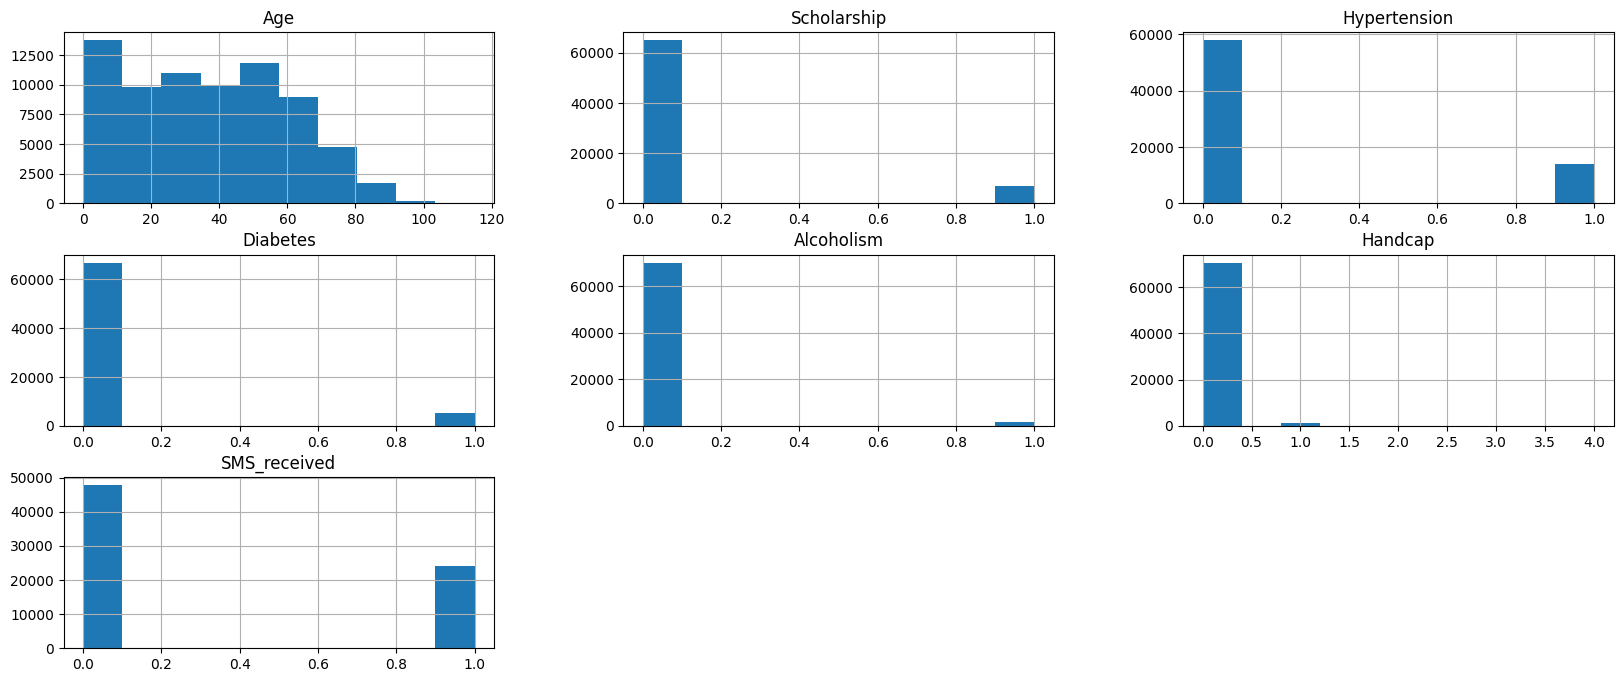

In [17]:
df.hist(figsize = (20,8));

In [18]:
show = df.No_show == 'No' 

noShow = df.No_show == 'Yes'

print('No of shown patients:\n',df[show].count())

print('\nNo of non shown patients:\n',df[noShow].count())

No of shown patients:
 Gender           54153
Age              54153
Neighbourhood    54153
Scholarship      54153
Hypertension     54153
Diabetes         54153
Alcoholism       54153
Handcap          54153
SMS_received     54153
No_show          54153
dtype: int64

No of non shown patients:
 Gender           17663
Age              17663
Neighbourhood    17663
Scholarship      17663
Hypertension     17663
Diabetes         17663
Alcoholism       17663
Handcap          17663
SMS_received     17663
No_show          17663
dtype: int64


**No. of showed patients is (54153) which is 3 time greater than non showed patients (17663)**

In [19]:
print(df[noShow].mean(numeric_only= True))
print("--------------------------")
print(df[show].mean(numeric_only= True))

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64
--------------------------
Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handcap          0.020904
SMS_received     0.297232
dtype: float64


**showed patients received SMS less than not showed, which means that we need to revisit out sms campaign and the mean age are almost the same.**

# Does Age affect attendence?

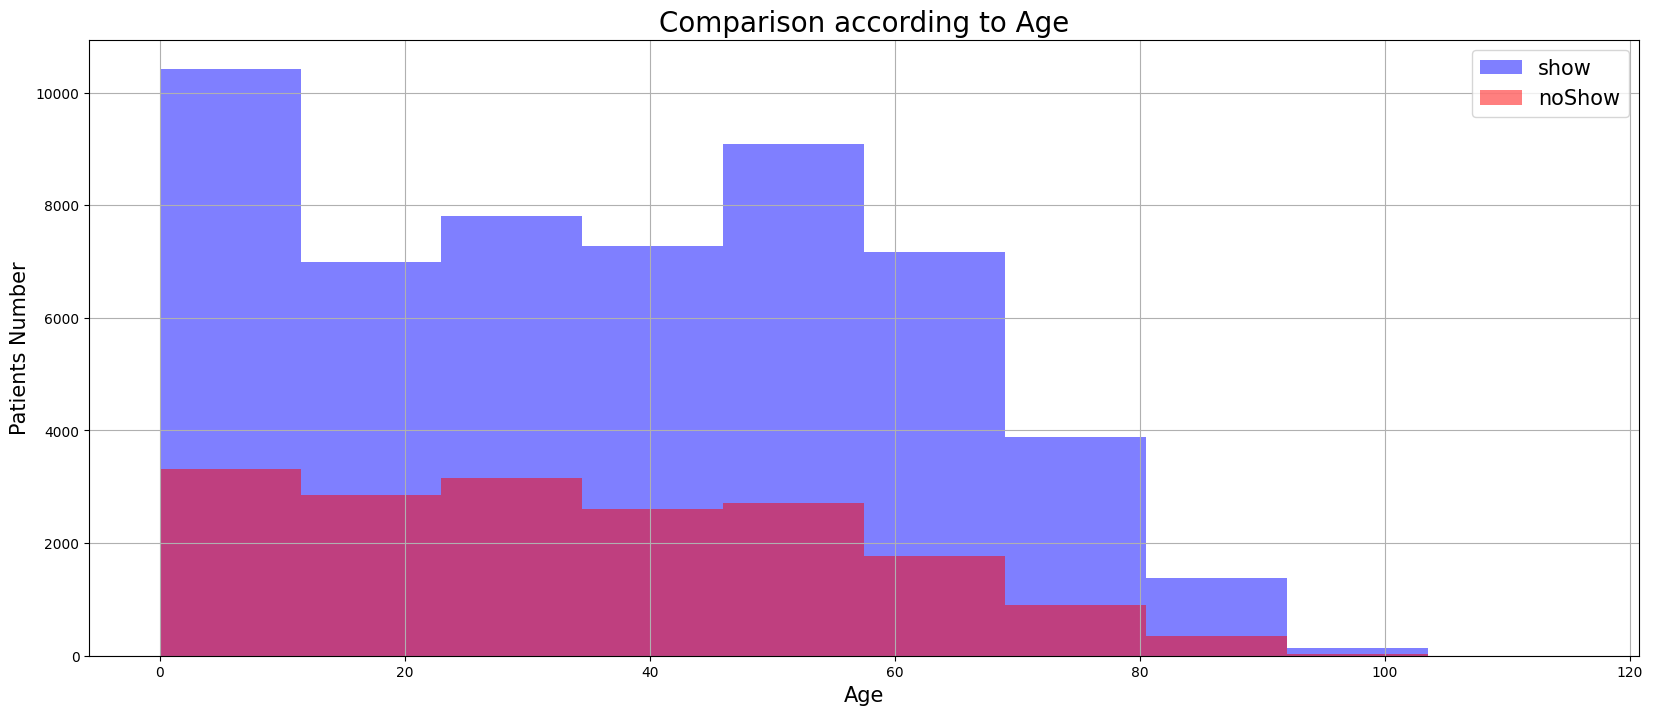

In [20]:
plt.figure(figsize=[20,8])

df['Age'][show].hist( alpha=0.5, bins=10, color="blue", label="show" )

df['Age'][noShow].hist( alpha=0.5, bins=10, color="red", label="noShow" )

plt.legend(fontsize = 15);

plt.title("Comparison according to Age",fontdict={'size':'20'});

plt.xlabel('Age',fontdict={'size':'15'});

plt.ylabel('Patients Number',fontdict={'size':'15'});

**Age from 0 to 8 are the most showing ( parents take care of their children ) then from 45 to 55 then the least attending are whom above 65 years old.**

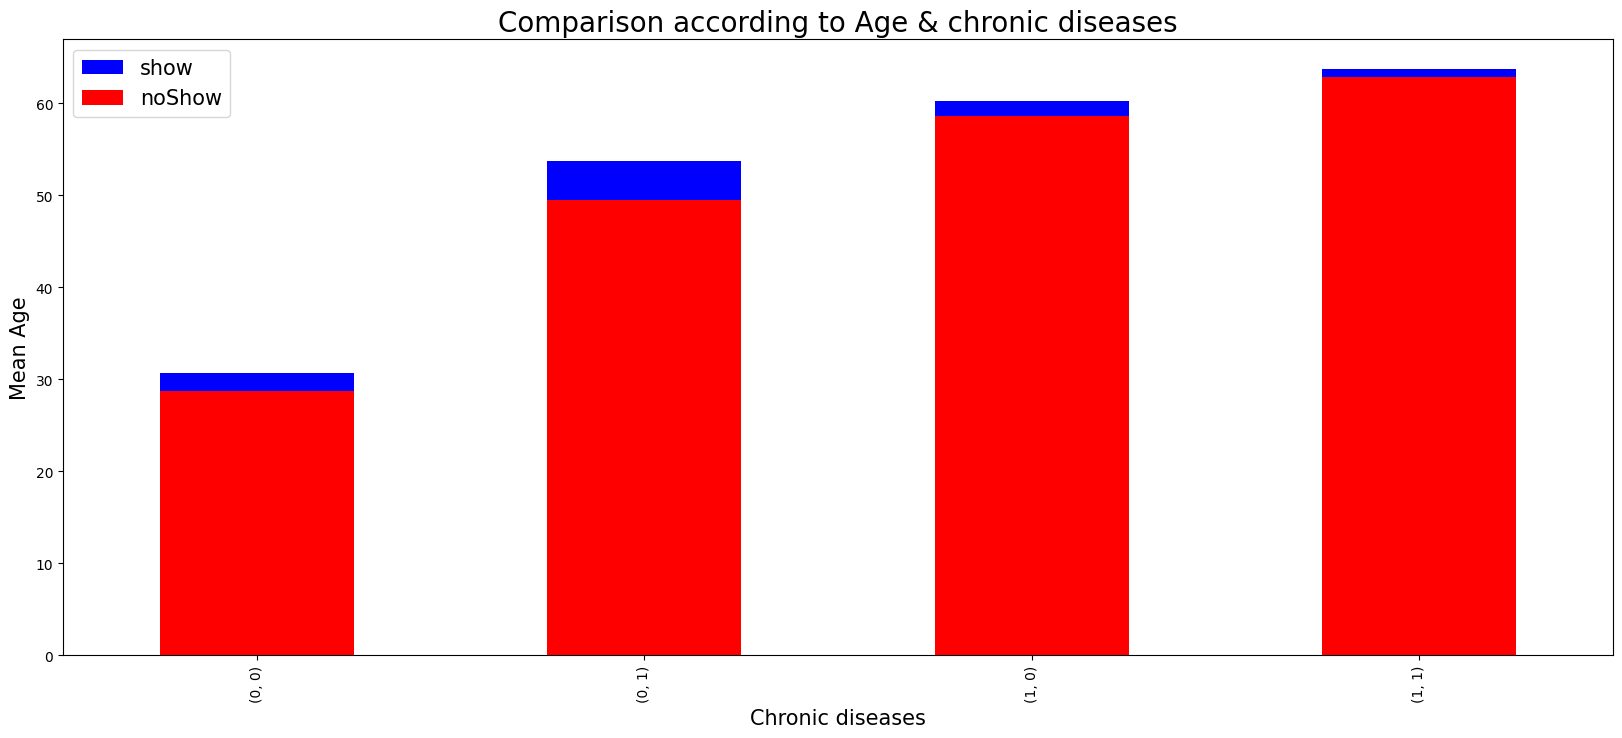

In [21]:
plt.figure(figsize=[20,8])

df[show].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind = 'bar' , color = 'blue' , label = 'show')
df[noShow].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind = 'bar' , color = 'red' , label = 'noShow')

plt.legend(fontsize = 15);

plt.title("Comparison according to Age & chronic diseases",fontdict={'size':'20'});

plt.xlabel('Chronic diseases',fontdict={'size':'15'});

plt.ylabel('Mean Age',fontdict={'size':'15'});

In [22]:
df[show].groupby(['Hypertension','Diabetes'])['Age'].mean(),df[noShow].groupby(['Hypertension','Diabetes'])['Age'].mean()

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64,
 Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

**the mean age of showing patients with no chronic diseases is 30 and for noshow is 28 , the mean age of showing patients with both Hypertension and Diabetes is 63 and for noshow is 62, so this means that there is a correlation between age and chronic diseases & no correlation between chronic diseases and attendce.**

# Does gender affect attendce? 

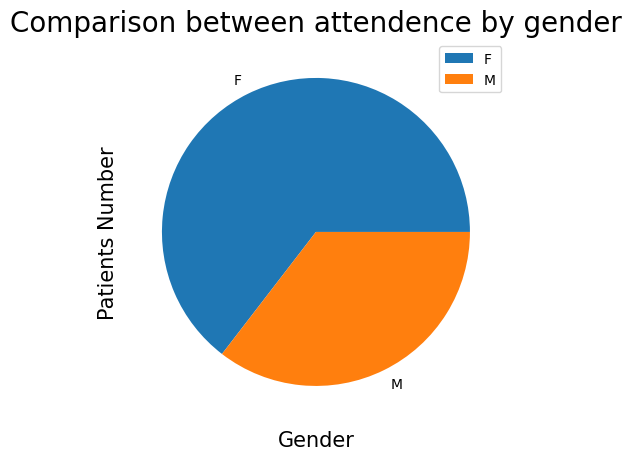

In [23]:
plt.figure(figsize=[15,5])

df['Gender'][show].value_counts(normalize = True).plot(kind = 'pie',label = 'show')

plt.legend(fontsize = 10);

plt.title("Comparison between attendence by gender",fontdict={'size':'20'});

plt.xlabel('Gender',fontdict={'size':'15'});

plt.ylabel('Patients Number',fontdict={'size':'15'});

**Gender has no effect on attendence**

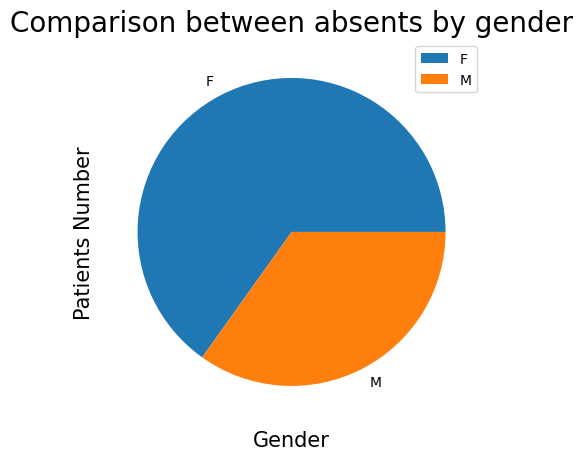

In [24]:
plt.figure(figsize=[15,5])

df['Gender'][noShow].value_counts(normalize = True).plot(kind = 'pie',label = 'noShow')

plt.legend(fontsize = 10);

plt.title("Comparison between absents by gender",fontdict={'size':'20'});

plt.xlabel('Gender',fontdict={'size':'15'});

plt.ylabel('Patients Number',fontdict={'size':'15'});

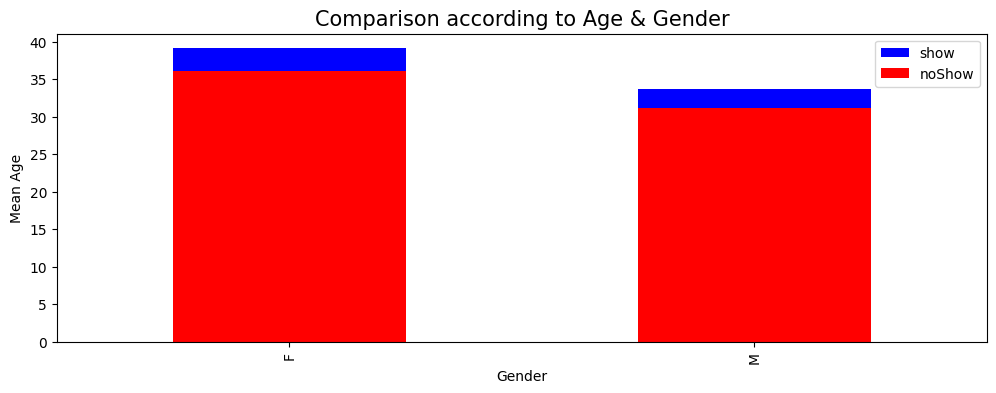

In [25]:
plt.figure(figsize=[12,4])

df[show].groupby(['Gender'])['Age'].mean().plot(kind = 'bar' , color = 'blue' , label = 'show')
df[noShow].groupby(['Gender'])['Age'].mean().plot(kind = 'bar' , color = 'red' , label = 'noShow')

plt.legend(fontsize = 10);

plt.title("Comparison according to Age & Gender",fontdict={'size':'15'});

plt.xlabel('Gender',fontdict={'size':'10'});

plt.ylabel('Mean Age',fontdict={'size':'10'});

In [26]:
df[show].groupby(['Gender'])['Age'].mean(),df[noShow].groupby(['Gender'])['Age'].mean()

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64,
 Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64)

**There is no correlation between Gender and Age affecting the show rate.**

**The mean of Gender Ages showing and no showing is almost the same**

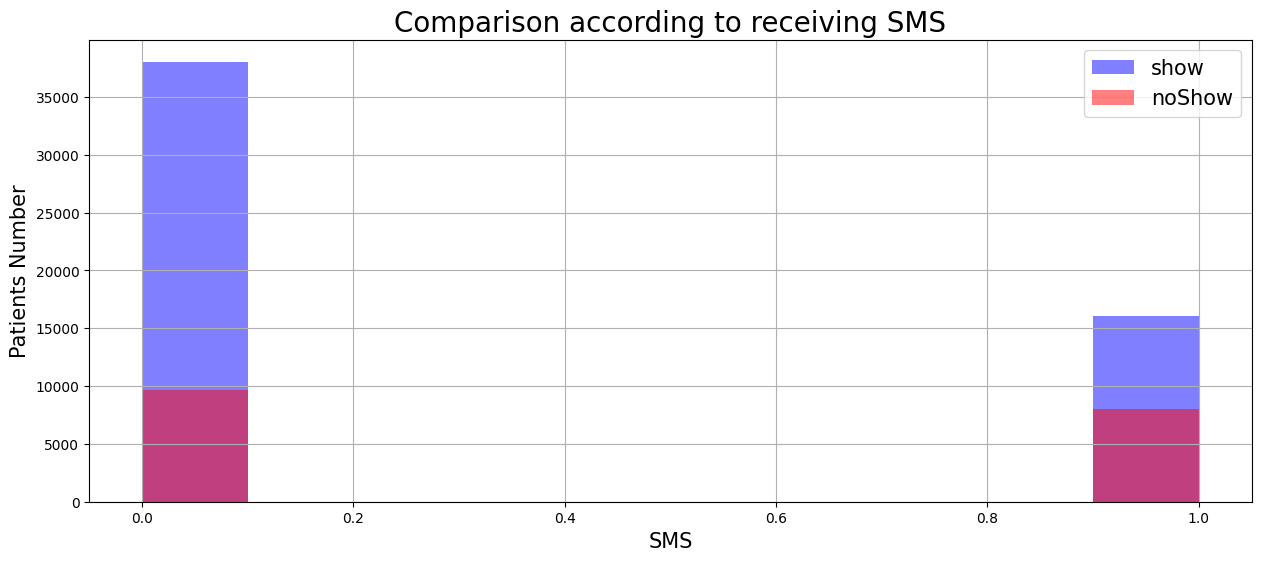

In [27]:
plt.figure(figsize=[15,6])

df['SMS_received'][show].hist( alpha=0.5, bins=10, color="blue", label="show" )

df['SMS_received'][noShow].hist( alpha=0.5, bins=10, color="red", label="noShow" )

plt.legend(fontsize = 15);

plt.title("Comparison according to receiving SMS",fontdict={'size':'20'});

plt.xlabel('SMS',fontdict={'size':'15'});

plt.ylabel('Patients Number',fontdict={'size':'15'});

**Number of showing patients without receiving SMS is greater than number of showing patients with receiving SMS, so this means that we need to revisit our SMS campaign.**

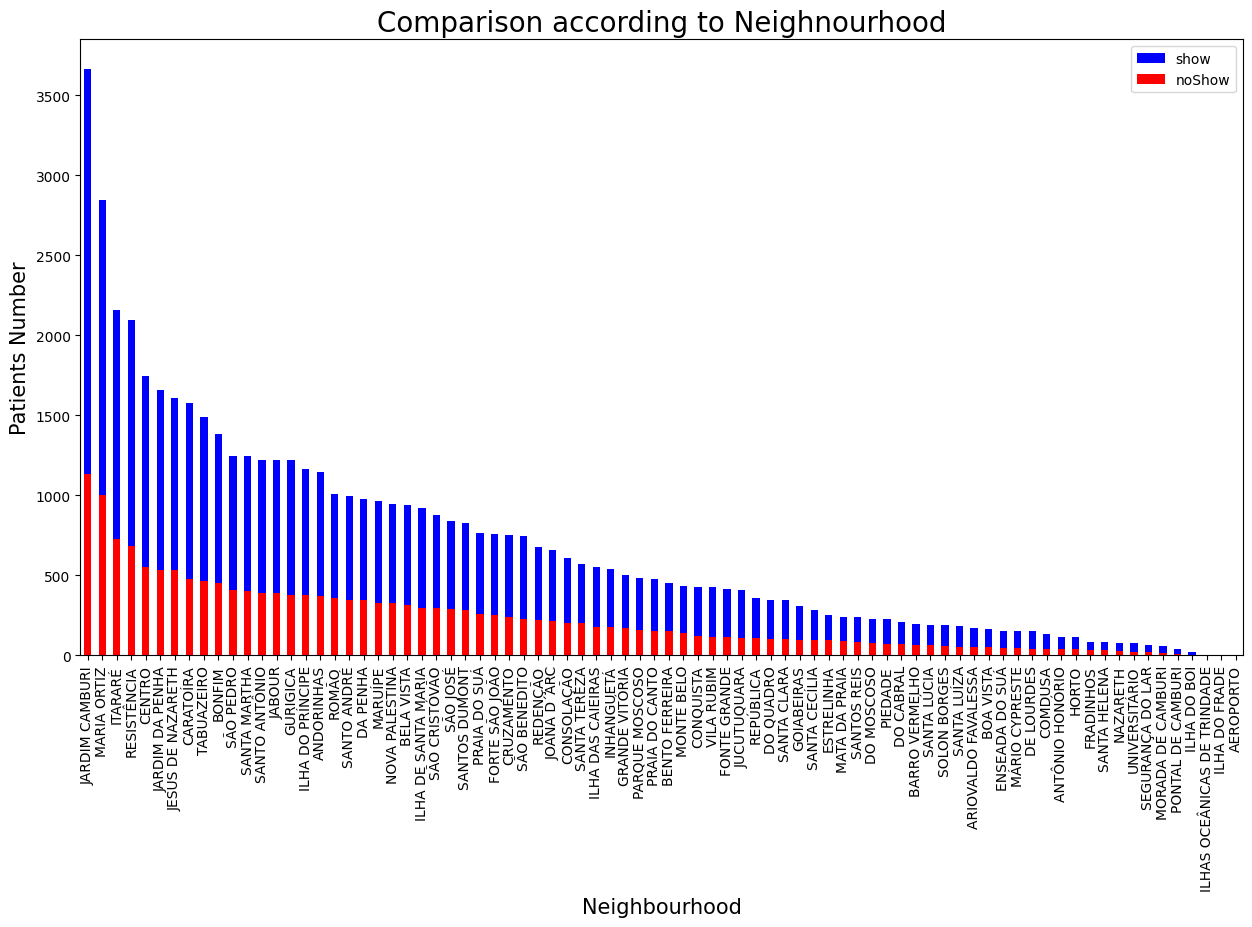

In [28]:
plt.figure(figsize=[15,8])

df['Neighbourhood'][show].value_counts().plot(kind = 'bar',color = 'blue',label = 'show')

df['Neighbourhood'][noShow].value_counts().plot(kind = 'bar',color = 'red',label = 'noShow')

plt.legend(fontsize = 10);

plt.title("Comparison according to Neighnourhood",fontdict={'size':'20'});

plt.xlabel('Neighbourhood',fontdict={'size':'15'});

plt.ylabel('Patients Number',fontdict={'size':'15'});

**Neighbourhood has a great effect on attending or not. 'JARDIM CAMBURI' has the greatest number of patients as well as showing rate.**

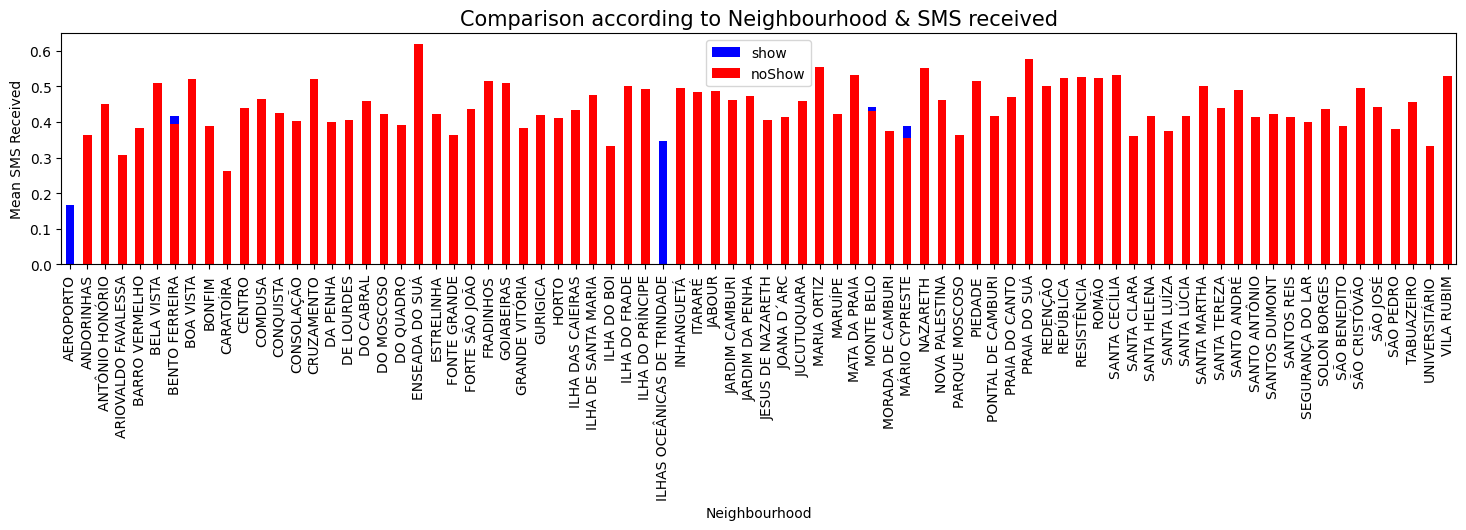

In [29]:
plt.figure(figsize=[18,3])

df[show].groupby(['Neighbourhood'])['SMS_received'].mean().plot(kind = 'bar' , color = 'blue' , label = 'show')
df[noShow].groupby(['Neighbourhood'])['SMS_received'].mean().plot(kind = 'bar' , color = 'red' , label = 'noShow')

plt.legend();

plt.title("Comparison according to Neighbourhood & SMS received",fontdict={'size':'15'});

plt.xlabel('Neighbourhood',fontdict={'size':'10'});

plt.ylabel('Mean SMS Received',fontdict={'size':'10'});

**SMS has resonded in 5 neighbourhoods 'ILHAS OCEANICAS DE TRINDADE' is the most responsive neighbourhood to SMS**

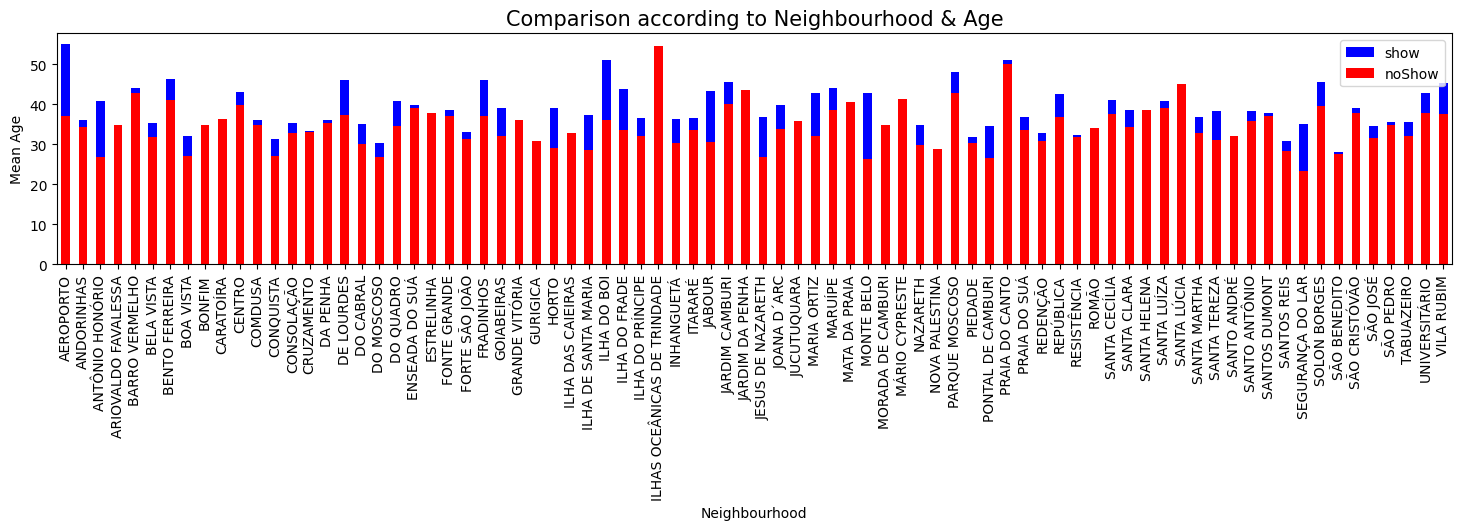

In [30]:
plt.figure(figsize=[18,3])

df[show].groupby(['Neighbourhood'])['Age'].mean().plot(kind = 'bar' , color = 'blue' , label = 'show')
df[noShow].groupby(['Neighbourhood'])['Age'].mean().plot(kind = 'bar' , color = 'red' , label = 'noShow')

plt.legend();

plt.title("Comparison according to Neighbourhood & Age",fontdict={'size':'15'});

plt.xlabel('Neighbourhood',fontdict={'size':'10'});

plt.ylabel('Mean Age',fontdict={'size':'10'});


# **Conclusions**
* Neighbourhood has a great effect on attendence or not, JARDIM CAMBURI has the greatest number of patients and also has the greatest showing rate.
* Number of showing patients from specific neighbourhood is affected by receiving SMS and Ages.
* Age has a clear influence on the showing rate: Ages from 0:8 are the most showing parents taking care of their kids) then from 45:55 and the least attending are whom above 65 years old.
* Number of showing patients without receiving sms is greater than showing patients with receiving sms, which means that we need to revisit our sms compagnin


# **Limitations**
No clear correlation between showing and gender, chronic diseases, enrollement in the welfare program